In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df=pd.read_csv(r'C:\Users\Pratham Bisht\Downloads\Titanic Dataset/train.csv')
test_df=pd.read_csv(r'C:\Users\Pratham Bisht\Downloads\Titanic Dataset/test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.shape

(891, 12)

# Data Cleaning

In [5]:
# isna()-> Gives count of nan values
# isnull()-> Gives count of nan values and empty values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: ylabel='Density'>

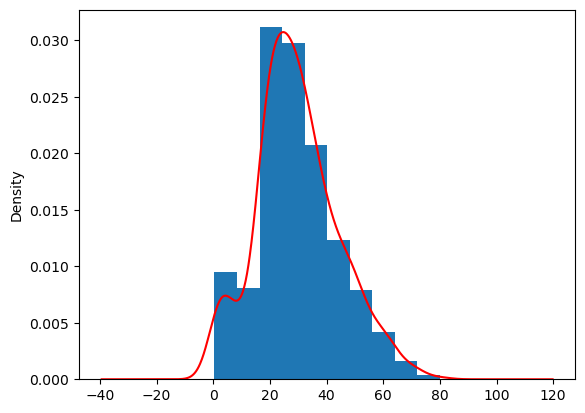

In [6]:
train_df['Age'].hist(bins = 10, density = True)
train_df['Age'].plot(kind='density',color='red')

<Axes: xlabel='Embarked', ylabel='count'>

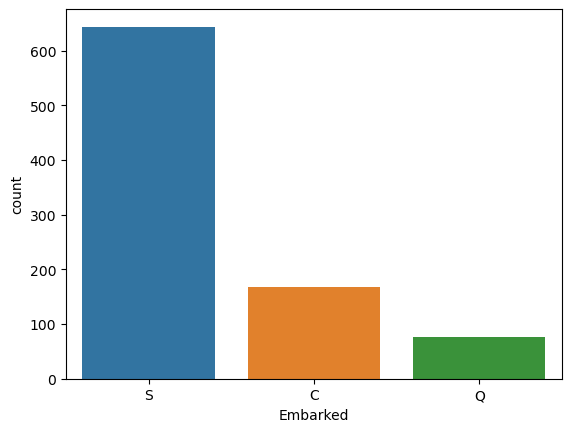

In [7]:
import seaborn as sns 

sns.countplot(x='Embarked',data=train_df)

In [8]:
all_data=train_df.copy()

In [9]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

<Axes: ylabel='Density'>

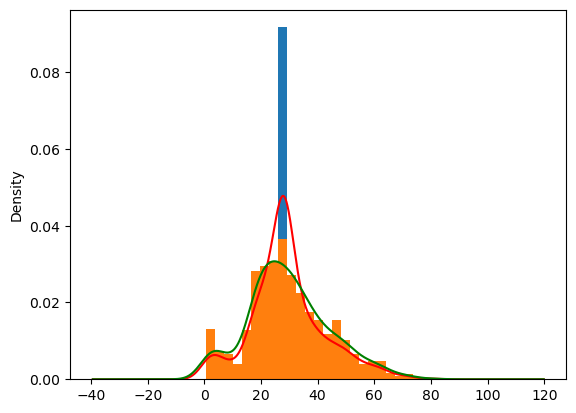

In [10]:
train_df['Age'].hist(bins = 25, density = True)
train_df['Age'].plot(kind='density',color='red')
all_data['Age'].hist(bins = 25, density = True)
all_data['Age'].plot(kind='density',color='green')

In [11]:
train_df['Travel_Alone']=np.where((train_df['SibSp'] + train_df['Parch'])>0,0,1)

In [12]:
train_df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Travel_Alone      0
dtype: int64

In [13]:
# we are dropping 'Cabin' col because more than 70% data is nan so we can't/shouldn't assume/assign that data using mean/median/mode
train_df.drop('Cabin',axis=1,inplace=True)

In [14]:
print(train_df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [15]:
# It is like putting mode value in place of nan
train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)

In [16]:
train_df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Travel_Alone    0
dtype: int64

In [17]:
# we are dropping these cols because they are not reqd in determining whether a person will survive or not
train_df.drop(['PassengerId','Name','Ticket','Parch','SibSp'],axis=1,inplace=True)

In [18]:
train_df # The following is meaningfull data reqd for prediction

,Survived,Pclass,Sex,Age,Fare,Embarked,Travel_Alone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,0
889,1,1,male,26.0,30.0000,C,1


In [19]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    object 
 6   Travel_Alone  891 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 45.4+ KB


In [21]:
train_df=pd.get_dummies(train_df,columns=['Sex','Embarked'])

In [22]:
train_df

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,False,True,False,False,True
1,1,1,38.0,71.2833,0,True,False,True,False,False
2,1,3,26.0,7.9250,1,True,False,False,False,True
3,1,1,35.0,53.1000,0,True,False,False,False,True
4,0,3,35.0,8.0500,1,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,False,True,False,False,True
887,1,1,19.0,30.0000,1,True,False,False,False,True
888,0,3,28.0,23.4500,0,True,False,False,False,True
889,1,1,26.0,30.0000,1,False,True,True,False,False


In [23]:
train_df['Sex_female'] = np.where((train_df['Sex_female']) == True, 1, 0)
train_df['Sex_male'] = np.where((train_df['Sex_male']) == True, 1, 0)
train_df['Embarked_C'] = np.where((train_df['Embarked_C']) == True, 1, 0)
train_df['Embarked_Q'] = np.where((train_df['Embarked_Q']) == True, 1, 0)
train_df['Embarked_S'] = np.where((train_df['Embarked_S']) == True, 1, 0)

In [24]:
train_df

,Survived,Pclass,Age,Fare,Travel_Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,0,1,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,1,0,0,0,1
3,1,1,35.0,53.1000,0,1,0,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,0,1,0,0,1
887,1,1,19.0,30.0000,1,1,0,0,0,1
888,0,3,28.0,23.4500,0,1,0,0,0,1
889,1,1,26.0,30.0000,1,0,1,1,0,0


<Axes: xlabel='Age', ylabel='Density'>

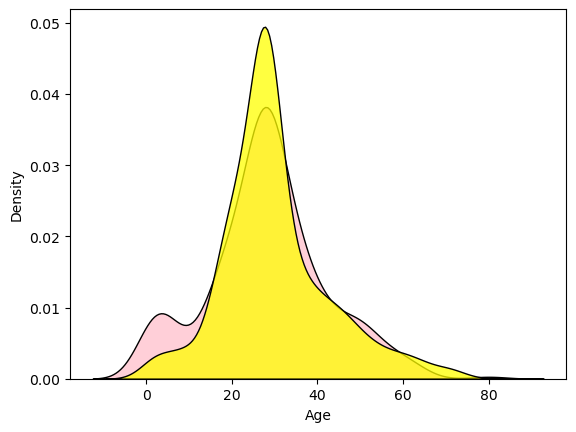

In [25]:
sns.kdeplot(data = train_df['Age'][train_df.Survived == 1], multiple = 'stack', color = 'pink')
sns.kdeplot(data = train_df['Age'][train_df.Survived == 0], multiple = 'stack', color = 'yellow')

<Axes: xlabel='Fare', ylabel='Density'>

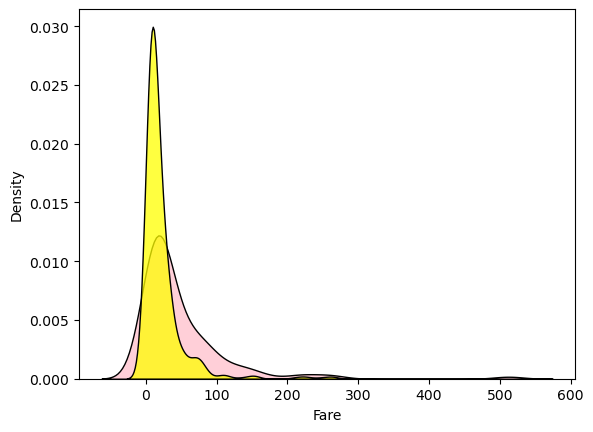

In [26]:
sns.kdeplot(data = train_df['Fare'][train_df.Survived == 1], multiple = 'stack', color = 'pink')
sns.kdeplot(data = train_df['Fare'][train_df.Survived == 0], multiple = 'stack', color = 'yellow')

<Axes: xlabel='Pclass', ylabel='Survived'>

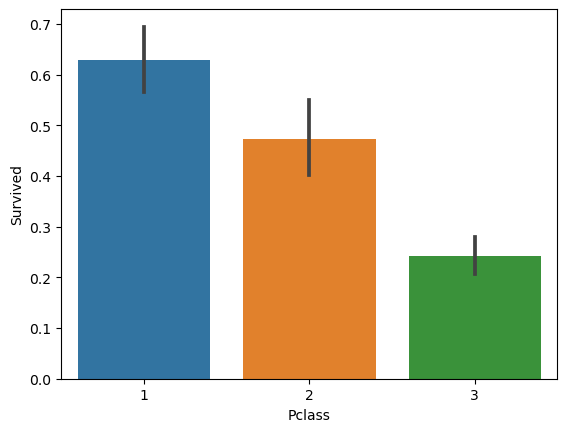

In [27]:
sns.barplot(data = train_df, x = 'Pclass', y = 'Survived')

<Axes: xlabel='Sex', ylabel='Pclass'>

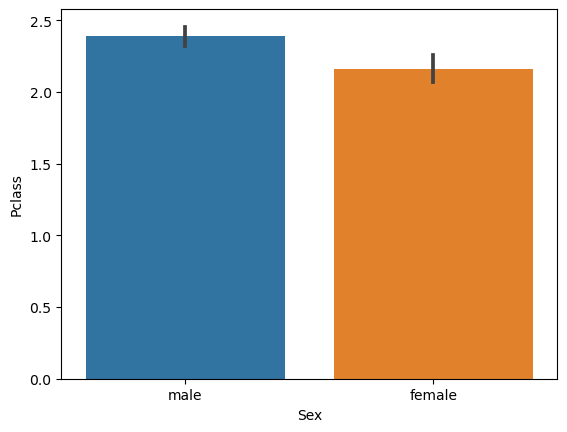

In [28]:
sns.barplot(data = all_data, x = 'Sex', y = 'Pclass')

<Axes: xlabel='Embarked', ylabel='Survived'>

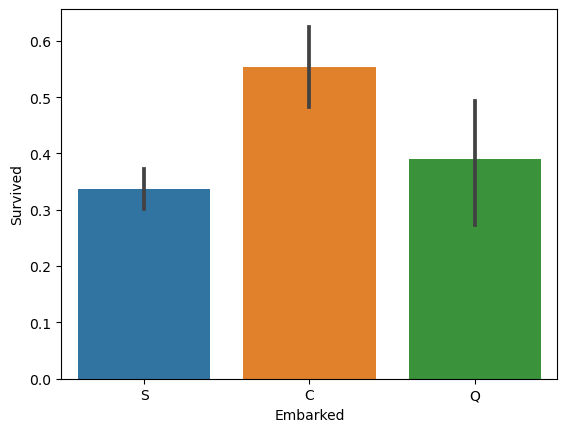

In [29]:
sns.barplot(data = all_data, x = 'Embarked', y = 'Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

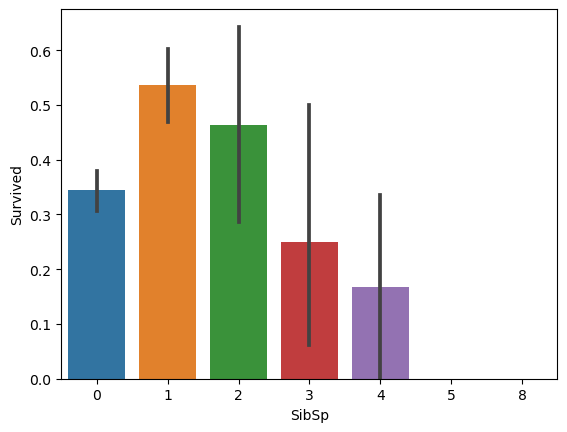

In [30]:
sns.barplot(data = all_data, x = 'SibSp', y = 'Survived')

<Axes: xlabel='Parch', ylabel='Survived'>

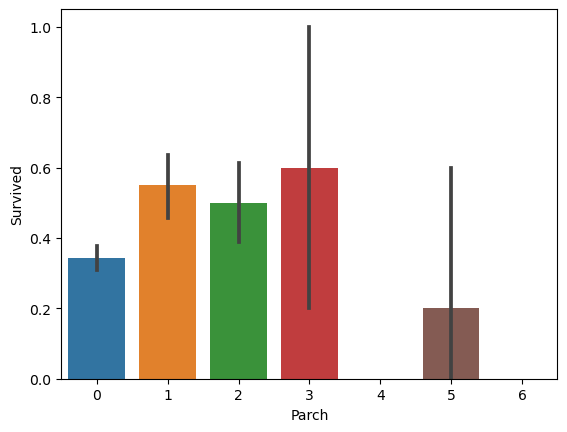

In [31]:
sns.barplot(data = all_data, x = 'Parch', y = 'Survived')

<Axes: xlabel='Travel_Alone', ylabel='Survived'>

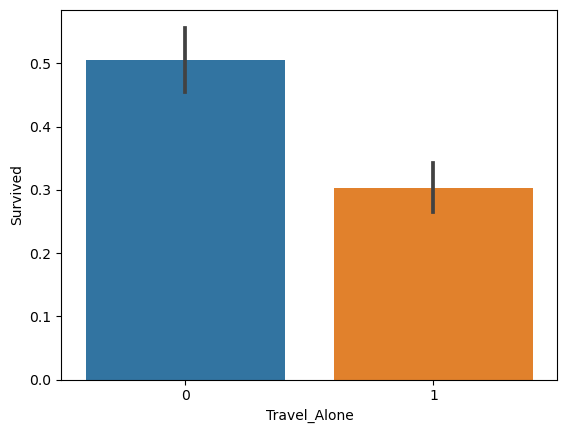

In [32]:
sns.barplot(data = train_df, x = 'Travel_Alone', y = 'Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

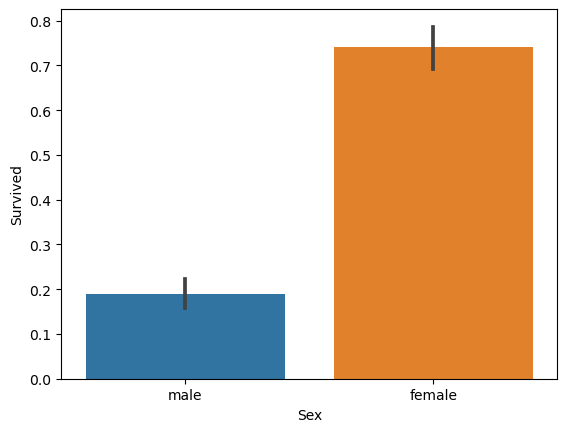

In [33]:
sns.barplot(data = all_data, x = 'Sex', y = 'Survived')

<Axes: xlabel='Sex', ylabel='Fare'>

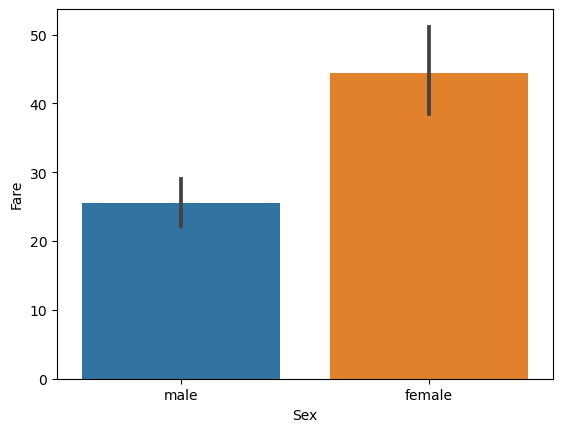

In [34]:
sns.barplot(data = all_data, x = 'Sex', y = 'Fare')

<Axes: xlabel='Sex', ylabel='SibSp'>

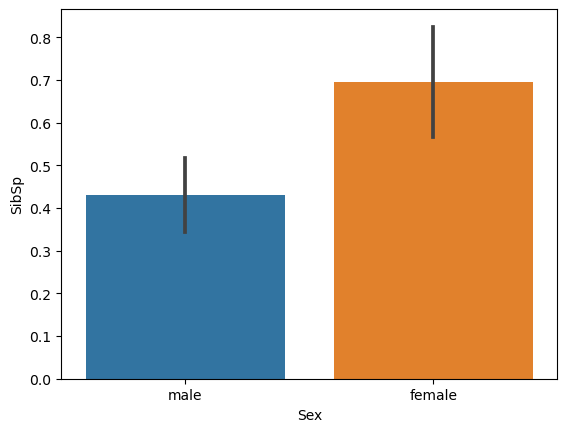

In [35]:
sns.barplot(data = all_data, x = 'Sex', y = 'SibSp')

<Axes: xlabel='Sex', ylabel='Parch'>

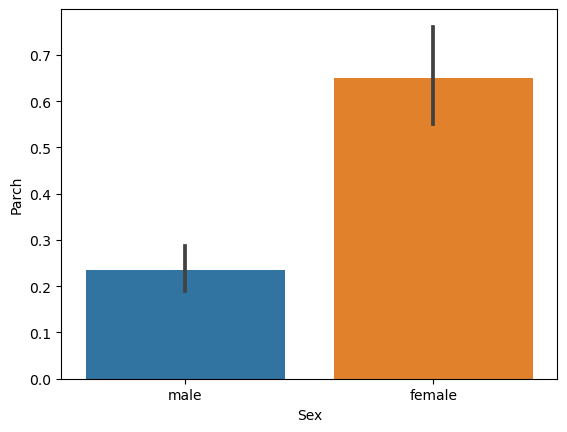

In [36]:
sns.barplot(data = all_data, x = 'Sex', y = 'Parch')

<Axes: xlabel='Pclass', ylabel='Age'>

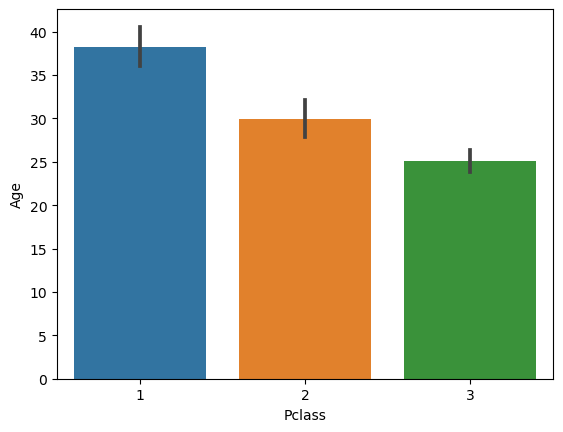

In [37]:
sns.barplot(data = all_data, x = 'Pclass', y = 'Age')

<Axes: >

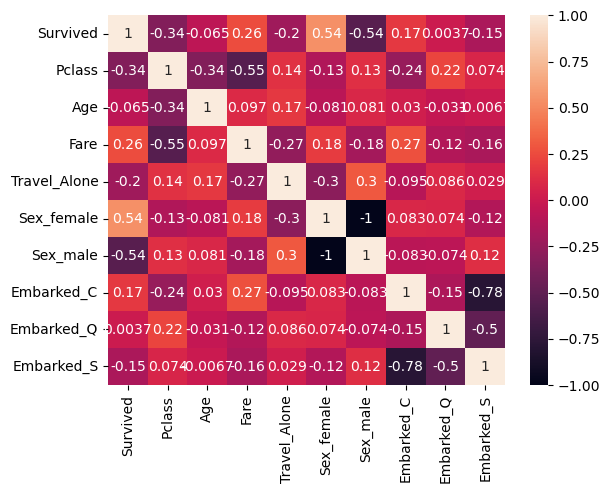

In [38]:
sns.heatmap(train_df.corr(), annot = True)

In [39]:
label = train_df['Survived']

In [40]:
train_df.drop(['Survived'], axis = 1, inplace = True)

In [41]:
train_df = train_df.values
label = label.values

In [42]:
ones = np.ones((train_df.shape[0], 1))
train_df = np.hstack((ones, train_df))

In [43]:
split = 0.8

train_X = train_df[:int(split * train_df.shape[0]), :]
test_X = train_df[int(split * train_df.shape[0]):, :]
train_Y = label[:int(split * label.shape[0])]
test_Y = label[int(split * label.shape[0]):]

In [44]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(712, 10) (179, 10) (712,) (179,)


In [45]:
def hypothesis(X, weights):
    return 1 / (1 + np.exp(-1 * np.dot(X, weights)))

In [46]:
def loss_func(X, weights, Y):
    Y_pred = hypothesis(X, weights)
    loss = np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
    return -1 * loss

In [47]:
def gradient(X, Y, weight):
    y_pred = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - y_pred))
        
    return grad/X.shape[0]

In [48]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], ))
    lr_rate = 0.003
    loss_epoch = []
    
    epochs = 100000
    
    for i in range(epochs):
        
        grad = gradient(X, Y, weights)
        
        loss_epoch.append(loss_func(X, weights, Y))
        
        weights = weights + lr_rate * grad
        
    return weights, loss_epoch

In [49]:
import time
start = time.time()
weights, loss_epoch = gradient_descent(train_X, train_Y)
print(time.time() - start)

7.070495843887329


In [50]:
loss_epoch

[0.6931471805599453,
 0.6536101337120834,
 0.6428701288201244,
 0.6390146703682131,
 0.6372879253982792,
 0.636437501039753,
 0.6358918492851912,
 0.6355648918389342,
 0.6353204641029938,
 0.6351376641516024,
 0.6349805737206655,
 0.6348401519026255,
 0.6347073086325824,
 0.6345789295304907,
 0.634452757054716,
 0.6343278714390873,
 0.6342037112314673,
 0.6340800242040207,
 0.6339566693404102,
 0.6338335795592355,
 0.633710718852014,
 0.6335880693782125,
 0.6334656216045654,
 0.633343370554357,
 0.6332213134303926,
 0.6330994485964005,
 0.6329777749839306,
 0.6328562918246298,
 0.632734998498109,
 0.6326138944631051,
 0.6324929792173748,
 0.6323722522804506,
 0.632251713182695,
 0.6321313614611871,
 0.6320111966565795,
 0.6318912183122259,
 0.6317714259732081,
 0.6316518191862123,
 0.6315323974991954,
 0.6314131604614063,
 0.6312941076232568,
 0.6311752385363549,
 0.6310565527534481,
 0.6309380498284458,
 0.6308197293163923,
 0.630701590773479,
 0.63058363375703,
 0.6304658578255075,
 

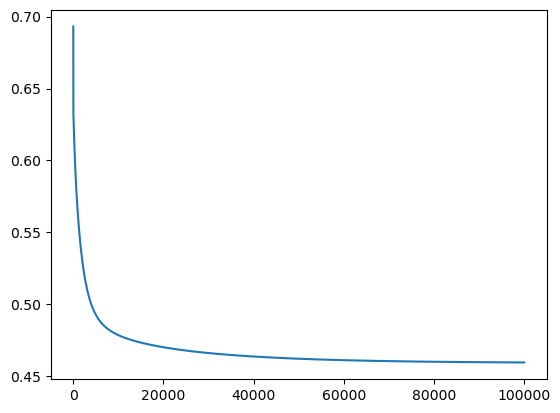

In [51]:
import matplotlib.pyplot as plt
plt.plot(loss_epoch)

In [52]:
def predict(X, weights):
    pred = hypothesis(X, weights)
    
    if pred > 0.5:
        return 1
    else:
        return 0

In [53]:
for i in range(test_X.shape[0]):
    print(predict(test_X[i],weights),test_Y[i])

0 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 1
0 0
1 1
1 1
0 0
1 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
0 1
0 0
0 0
1 1
0 1
0 0
0 0
0 0
1 1
0 0
0 0
0 1
1 1
0 0
1 1
1 0
1 0
0 0
0 0
0 0
0 0
1 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 1
0 0
0 0
0 0
1 0
1 0
0 0
0 0
1 1
1 1
0 0
1 0
0 0
1 1
1 1
0 1
0 1
0 0
0 0
1 0
0 0
1 1
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 0
0 0
0 0
1 1
0 1
0 0
1 1
0 0
0 0
0 0
0 1
0 1
1 1
1 1
0 1
0 0
0 0
0 0
1 1
0 0
0 0
0 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1
1 0
1 1
1 1
0 1
1 1
0 0
0 0
0 0
1 1
1 0
0 0
1 1
1 1
0 0
0 0
0 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
1 1
0 0
1 0
0 0
0 0
1 0
0 0
1 1
1 0
1 1
0 0


In [54]:
print(predict(test_X[0], weights), test_Y[0])

0 1


In [55]:
corr = 0

for i in range(test_X.shape[0]):
    pred = predict(test_X[i], weights)
    if pred == test_Y[i]:
        corr += 1
print(corr/test_X.shape[0])


0.8100558659217877
